## Advanced Machine Learning - Scikit Learn 
### with Adreas Mueller

### API Review
* How to use supervised and unsupervised models
* Building a classifier model
* The model is built using 'fit' method, applied with 'predict' method, evaluated using 'score' method

## Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Load data to work with and explore:
* Digits object is returned as 'bunch' object, similar to dictionary
* Bunch objects are used to store datasets in sklearn's datasets module
* Convenient way to bundle some numpy arrays
* The bunch contains images, data, and target 

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

### Digits object
* 1797 greyscale images of handwritten digits
* Very low resoluation of 8 x 8 pixels
* Look at first image by indexing the first image array

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

### Plot the data
* Using matplotlib function
* See very low resolution conversion of a handwritten zero
* This is classification dataset with ten classes, digits from 0 to 9
* GOAL: Go from low resolution image to actual number that is drawn 

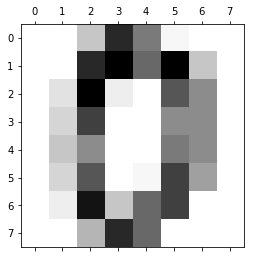

In [5]:
plt.matshow(digits.images[0], cmap=plt.cm.Greys)

### Dataset
* Each image is a single row of 64 pixels in this 2D array
* Also contains target class labels, info about which digit was drawn; 
* contained in digits the target, which is a 1D array, one entry for each image in dataset. 


In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)
* Call the data X and the target y
* To start with, split data into TRAIN (75%) and TEST sets (25%)
* Use the TRAIN set to build (i.e., "FIT") the model
* Use the TEST set to evaluate its generalization performance

In [10]:
# Assign training data to X_train, and test data to X_test
# and similarly for the target y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

### Really Simple API: Fit Train data, Predict Test data, Evaluate model accuracy
Let's start by training a sklearn Classifier. All algorithms in sklearn are implemented in classes that contain the training procedures as well as the model. Say we want to use the Linear Support Vector Machine on the digits dataset. We first import the linear SVC class from the svm module that implements the linear support vector classifier. 

##### Import model class

In [11]:
from sklearn.svm import LinearSVC

##### Instantiate an object (of that class) and set parameters

In [13]:
svm = LinearSVC(C=0.1)

#### 1) Fit the model
* Provide SVM model with the TRAIN data, and target labels
* After calling the fit method, the model is trained, and coefficients are stored in svm object

In [18]:
svm.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

##### Apply the model to training data
* Now we apply the model to any data to make predictions
* First, apply it to training data set, X_train
* Prediction for classifier are made with predict method that returns a class label for each data point, compared here with the actual class labels (y_train)

In [19]:
print(svm.predict(X_train))
print(y_train)

[4 2 5 ..., 1 9 7]
[4 2 5 ..., 1 9 7]


#### 3) Evaluate model accuracy using score method
* Score method allows for quantitative evaluation of predition
* Accuracy is the fraction of correctly predicted target labels for the samples
* Indication of how well the model predict new data (i.e., "unseen") from the TEST set

In [20]:
svm.score(X_train, y_train)

0.99851521900519669

In [21]:
svm.score(X_test, y_test)

0.94666666666666666

## Random Forest Classifier Model
* All Classifiers use the same Fit, Predict, and Score methods
* Import RandomTreeClassifier, instantiate object of the model, and set number of trees to 50
* Set random_state to fixed integer seed, which allows for reproducible results

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=1)

#### 1) Build RF model using Fit method

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

#### 2) Predict new data based on RF model 

In [24]:
rf.predict(X_test)

array([1, 4, 8, 4, 4, 8, 9, 5, 9, 2, 2, 7, 5, 7, 6, 3, 1, 4, 9, 8, 1, 4, 4,
       3, 8, 1, 3, 1, 0, 2, 6, 9, 8, 8, 3, 2, 5, 7, 5, 4, 4, 7, 7, 9, 2, 9,
       8, 6, 0, 0, 2, 3, 6, 2, 5, 9, 3, 7, 7, 0, 2, 0, 2, 5, 0, 6, 8, 6, 1,
       3, 1, 8, 2, 4, 5, 6, 7, 2, 1, 0, 3, 7, 4, 0, 0, 9, 4, 6, 3, 7, 6, 8,
       8, 3, 5, 4, 3, 1, 5, 5, 7, 4, 8, 8, 5, 6, 1, 8, 7, 1, 1, 1, 5, 0, 4,
       9, 7, 1, 0, 1, 1, 3, 0, 9, 7, 9, 2, 3, 7, 7, 3, 6, 1, 1, 4, 4, 6, 9,
       6, 2, 8, 3, 8, 0, 7, 4, 5, 2, 3, 4, 1, 3, 1, 6, 2, 8, 3, 4, 0, 8, 9,
       4, 9, 7, 4, 9, 6, 4, 7, 4, 8, 6, 2, 5, 9, 1, 7, 5, 4, 7, 0, 1, 1, 8,
       8, 2, 9, 2, 7, 4, 4, 9, 2, 5, 5, 3, 2, 6, 9, 7, 9, 0, 9, 5, 5, 1, 0,
       9, 7, 9, 6, 7, 0, 2, 3, 1, 8, 2, 2, 7, 3, 3, 1, 5, 8, 7, 4, 8, 0, 9,
       9, 9, 6, 8, 8, 0, 5, 6, 3, 1, 8, 1, 1, 2, 6, 4, 3, 2, 7, 2, 6, 1, 9,
       3, 6, 6, 8, 7, 1, 7, 6, 0, 7, 1, 2, 9, 8, 0, 0, 4, 5, 5, 3, 9, 6, 6,
       6, 9, 2, 2, 1, 6, 3, 7, 4, 1, 1, 9, 5, 6, 6, 6, 7, 7, 8, 6, 5, 9, 9,
       1, 7,

#### 3) Evaluate model accuracy with Score method

In [25]:
rf.score(X_test, y_test)

0.97777777777777775

## Classifier Comparison
As each classifier can be indicated by a single line, it is very easy to compare different classsifiers using the same dataset. See the SciKit-Learn webpage for an example showing a comparison of a several classifiers in scikit-learn on synthetic datasets.
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 

On the left side, we see three different toy datasets. Each plot shows a dataset with two features, one on the x-asix and one on the y-axis; every dot represents a single observation. There are two classes, red and blue. The lighter points are the training set, while the opaque points are the test set. 

The columns to the right show the various solutions obtained from classifiers in sklearn. 

The point of this example is to illustrate the nature of decision boundaries of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

## Labels Can Be Anything
Final note on the sklearn classifier interface, it is not necessary to encode classes as integers; you can use arbitrary python objects, e.g., 'strings'. Often, it is much more natural to encode classes as string names instead of using integers. 

Below, string names are given to classes in the digit dataset instead of numbers, just by writing out the numbers. Then we map training labels on y_train to the strings using the numbers array, and then Fit an svm to the data using the string labels. 

Now, call predict on the TEST set, and we see the predictions are actually strings, not integers. Which is often helpful as we don't have to keep the connection between classes and integers.  

In [26]:
numbers = np.array(["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"])

In [27]:
y_train_string = numbers[y_train]
svm.fit(X_train, y_train_string)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [28]:
svm.predict(X_test)

array(['three', 'four', 'eight', 'four', 'four', 'eight', 'nine', 'five',
       'nine', 'two', 'two', 'seven', 'five', 'seven', 'six', 'three',
       'one', 'four', 'nine', 'eight', 'one', 'four', 'four', 'three',
       'eight', 'eight', 'nine', 'six', 'zero', 'two', 'six', 'nine',
       'eight', 'eight', 'three', 'two', 'five', 'seven', 'five', 'four',
       'four', 'seven', 'seven', 'nine', 'two', 'nine', 'eight', 'six',
       'zero', 'zero', 'two', 'three', 'six', 'two', 'five', 'nine',
       'three', 'seven', 'nine', 'zero', 'two', 'zero', 'two', 'five',
       'zero', 'six', 'eight', 'six', 'one', 'three', 'one', 'eight',
       'two', 'four', 'five', 'six', 'seven', 'two', 'one', 'zero',
       'three', 'seven', 'four', 'zero', 'zero', 'nine', 'four', 'six',
       'three', 'seven', 'six', 'eight', 'eight', 'three', 'five', 'four',
       'three', 'one', 'five', 'five', 'seven', 'four', 'eight', 'eight',
       'five', 'six', 'one', 'eight', 'seven', 'one', 'one', 'one', '